In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## SVM on Raw Sensor Data with PCA

In [2]:
data1 = pd.read_csv('data/raw/Analyte1.csv')
data1['label'] = 1
print(len(data1))

data2 = pd.read_csv('data/raw/Analyte2.csv')
data2['label'] = 2
print(len(data2))

data3 = pd.read_csv('data/raw/Analyte3.csv')
data3['label'] = 3
print(len(data3))

data = pd.concat([data1, data2, data3], axis=0)
data = data.drop(columns=['log']).reset_index(drop=True)
print(len(data))
data.head()

25
25
25
75


,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,30500000.0,70.734,-68.02,52.47,1
1,3050000.0,50.162,-95.70,32.63,1
2,305000.0,-8.390,-99.96,-10.41,1
3,30500.0,-18.700,-107.42,-23.93,1
4,3050.0,-19.620,-109.94,-27.24,1


In [3]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Sensor1','Sensor2','Sensor3']])
pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2'])

pca_data['Label'] = data['label']
pca_data.head(3)

,PC1,PC2,Label
0,-22.442149,55.984647,1
1,-43.457599,24.248253,1
2,-31.610782,-43.949584,1


In [4]:
svc = SVC(kernel='linear')
svc.fit(pca_data[['PC1','PC2']], pca_data['Label'])

x_min, x_max = pca_data['PC1'].min() - 1, pca_data['PC1'].max() + 1
y_min, y_max = pca_data['PC2'].min() - 1, pca_data['PC2'].max() + 1
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


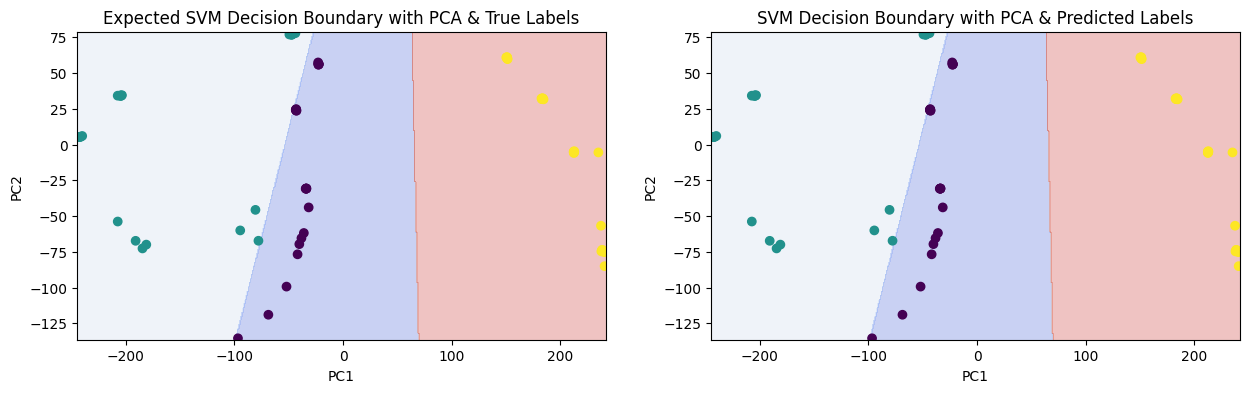

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))


ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[0].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Label'], marker='o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')

predicted_labels = svc.predict(pca_data[['PC1', 'PC2']])

ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=predicted_labels, marker='o')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')

fig.savefig('docs/plots/svm/svm_on_raw.png')

plt.show()

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(pca_data['Label'], predicted_labels)
print(f"Accuracy of SVM predictions: {accuracy*100:.2f}%")

Accuracy of SVM predictions: 100.00%


## SVM on Sampled Data

In [7]:
data1 = pd.read_csv('data/sampled/Sampled_Analyte1.csv')
data1['label'] = 1
print(len(data1))

data2 = pd.read_csv('data/sampled/Sampled_Analyte2.csv')
data2['label'] = 2
print(len(data2))

data3 = pd.read_csv('data/sampled/Sampled_Analyte3.csv')
data3['label'] = 3
print(len(data3))

data = pd.concat([data1, data2, data3], axis=0).reset_index(drop=True)
# data = data.drop(columns=['log']).
print(len(data))
data.head()

90
90
90
270


,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,1.000000,-65.500000,-183.780000,-68.340000,1
1,1.000000,-50.570000,-150.230000,-64.370000,1
2,4.823568,-43.064938,-139.598296,-59.485688,1
3,5.084643,-42.676849,-137.757223,-58.052060,1
4,5.204945,-42.203437,-140.403934,-58.752021,1


In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Sensor1','Sensor2','Sensor3']])
pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2'])

pca_data['Label'] = data['label']
pca_data.head(3)

,PC1,PC2,Label
0,-103.196709,-92.215511,1
1,-73.949400,-77.182193,1
2,-65.382819,-67.938741,1


In [9]:
svc = SVC(kernel='linear')
svc.fit(pca_data[['PC1','PC2']], pca_data['Label'])

x_min, x_max = pca_data['PC1'].min() - 1, pca_data['PC1'].max() + 1
y_min, y_max = pca_data['PC2'].min() - 1, pca_data['PC2'].max() + 1
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


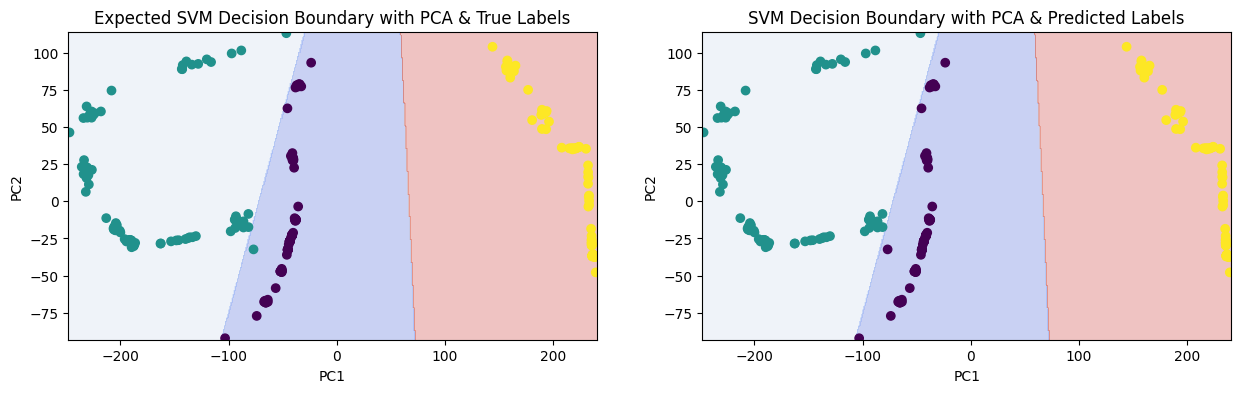

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))


ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[0].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Label'], marker='o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')

predicted_labels = svc.predict(pca_data[['PC1', 'PC2']])

ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=predicted_labels, marker='o')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')

fig.savefig('docs/plots/svm/svm_on_sampled.png')

plt.show()

In [11]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(pca_data['Label'], predicted_labels)
print(f"Accuracy of SVM predictions: {accuracy*100:.2f}%")

print(classification_report(pca_data['Label'], predicted_labels))

Accuracy of SVM predictions: 99.63%
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        90
           2       1.00      0.99      0.99        90
           3       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



## SVM on Exponential

In [12]:
data1 = pd.read_csv('data/exponential/Exponential_Analyte1.csv')
data1['label'] = 1
print(len(data1))

data2 = pd.read_csv('data//exponential/Exponential_Analyte2.csv')
data2['label'] = 2
print(len(data2))

data3 = pd.read_csv('data/exponential/Exponential_Analyte3.csv')
data3['label'] = 3
print(len(data3))

data = pd.concat([data1, data2, data3], axis=0).reset_index(drop=True)
# data = data.drop(columns=['log']).reset_index(drop=True)
print(len(data))
data.head()

1022
1022
1022
3066


,CFU/mL,Sensor1,Sensor2,Sensor3,label
0,3.044649e+07,-68.073957,70.693899,52.431326,1
1,3.039298e+07,-68.127914,70.653797,52.392651,1
2,3.033947e+07,-68.181871,70.613696,52.353977,1
3,3.028596e+07,-68.235828,70.573595,52.315302,1
4,3.023246e+07,-68.289786,70.533493,52.276628,1


In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Sensor1','Sensor2','Sensor3']])
pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2'])

pca_data['Label'] = data['label']
pca_data.head(3)

,PC1,PC2,Label
0,-18.729535,44.760409,1
1,-18.770280,44.696929,1
2,-18.811025,44.633449,1


In [14]:
svc = SVC(kernel='linear')
svc.fit(pca_data[['PC1','PC2']], pca_data['Label'])

x_min, x_max = pca_data['PC1'].min() - 1, pca_data['PC1'].max() + 1
y_min, y_max = pca_data['PC2'].min() - 1, pca_data['PC2'].max() + 1
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


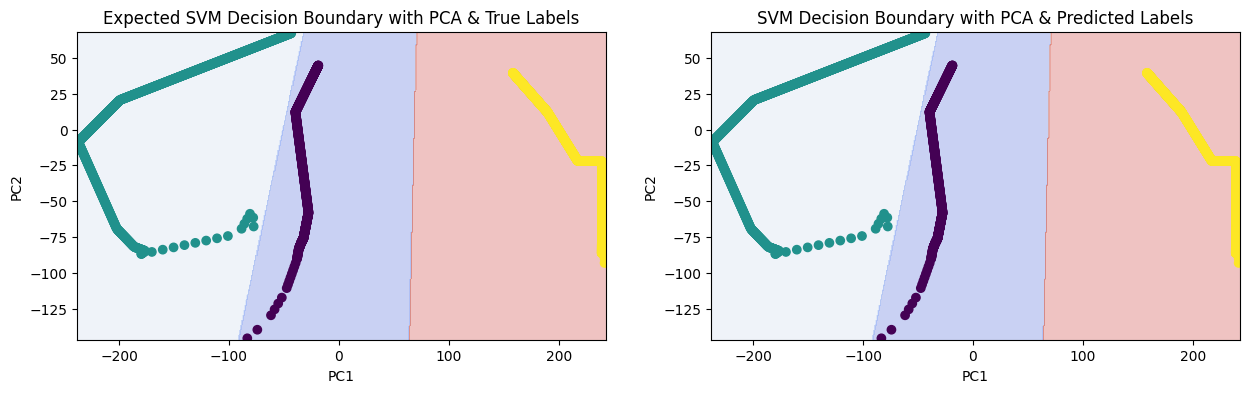

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))


ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[0].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Label'], marker='o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')

predicted_labels = svc.predict(pca_data[['PC1', 'PC2']])

ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=predicted_labels, marker='o')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')

fig.savefig('docs/plots/svm/svm_on_expo.png')

plt.show()

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(pca_data['Label'], predicted_labels)
print(f"Accuracy of SVM predictions: {accuracy*100:.2f}%")

Accuracy of SVM predictions: 100.00%


## Exponential from 'pca_clustering.ipynb'

In [17]:
analyte1 = pd.read_csv('data/exponential/Exponential_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte2 = pd.read_csv('data/exponential/Exponential_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte3 = pd.read_csv('data/exponential/Exponential_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

analyte1['Label'] = 0
analyte2['Label'] = 1
analyte3['Label'] = 2
combined_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

data = combined_data[['Sensor1','Sensor2','Sensor3','Label']]
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['Label']

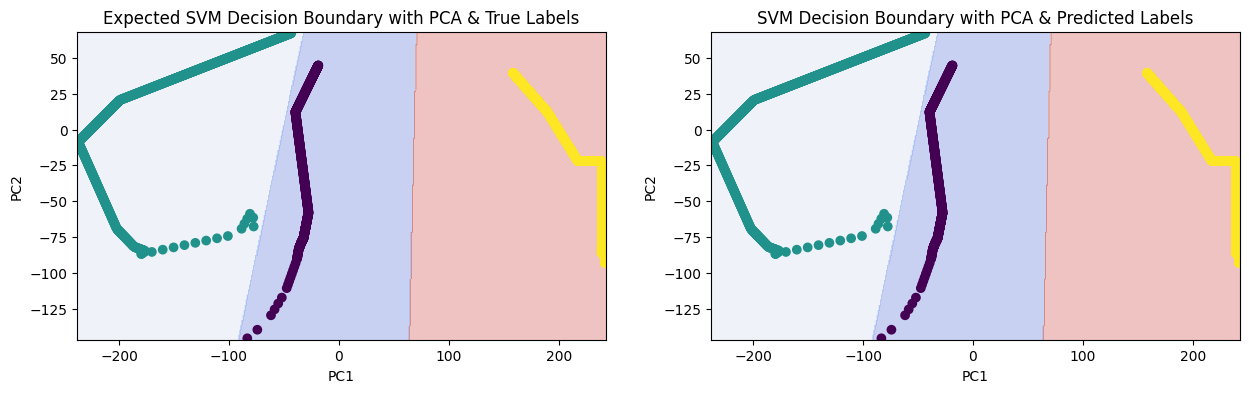

In [18]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

svc = SVC(kernel='linear')
svc.fit(pca_features, labels)

predicted_labels = svc.predict(pca_features)

x_min, x_max = pca_features[:, 0].min() - 1, pca_features[:, 0].max() + 1
y_min, y_max = pca_features[:, 1].min() - 1, pca_features[:, 1].max() + 1
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[0].scatter(pca_features[:, 0], pca_features[:, 1], c=labels, marker='o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')

ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[1].scatter(pca_features[:, 0], pca_features[:, 1], c=predicted_labels, marker='o')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')

fig.savefig('docs/plots/svm/svm_on_expo_pca.png')

plt.show()

In [19]:
from sklearn.metrics import accuracy_score

print("Accuracy of SVM predictions: {:.2f}%".format(accuracy_score(labels, predicted_labels) * 100))

Accuracy of SVM predictions: 100.00%
